In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
df = pd.read_csv('../Datasets/Breast_cancer_wisconsin.csv').replace('?',np.nan)
df = df.fillna(df.median())
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


## Explore the dataset

In [3]:
df.shape

(699, 10)

In [4]:
df.columns.values

array(['clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'], dtype=object)

In [5]:
df['class'].unique()

array([0, 1])

In [6]:
df['class'].value_counts(normalize=True)

0    0.655222
1    0.344778
Name: class, dtype: float64

## Select the features

In [7]:
colnames = df.columns.values
x = df[colnames[0:9]]
y = df[colnames[9]]

## Split into train and test sets

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

## Scale the features

In [9]:
x_sc = MinMaxScaler()
y_sc = MinMaxScaler()
x_train = x_sc.fit_transform(x_train)
x_test = x_sc.transform(x_test)
y_train = y_sc.fit_transform(y_train)
y_test = y_sc.transform(y_test)

## Train the model

In [10]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Evaluate the model

In [11]:
model.score(x_test,y_test)

0.94857142857142862

## Make predictions

In [12]:
y_pred = model.predict(x_test)

## Confusion matrix

In [13]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[110,   6],
       [  3,  56]])

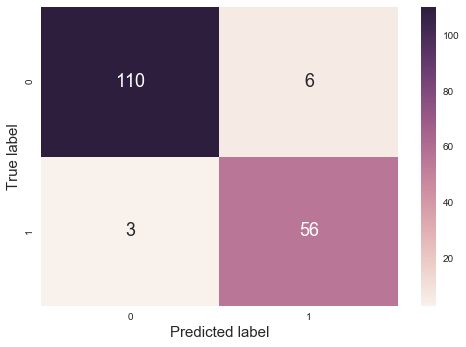

In [14]:
#sbn.heatmap(cm,cbar=True,cmap='cool', annot=True,square=True,fmt='d',annot_kws={'size': 18})
sbn.heatmap(cm, annot=True, fmt='d', annot_kws={'size': 18})
plt.ylabel('True label', fontsize=15)
plt.xlabel('Predicted label', fontsize=15)
plt.show()